In [45]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [46]:
data=pd.read_csv("/home/placement/Desktop/venkatesh/fiat500.csv")

In [47]:
data

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [48]:
data1=data.loc[(data.previous_owners==1)]
data1

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [49]:
data1=data.drop(['ID','lat','lon'],axis=1)

In [50]:
data1=pd.get_dummies(data1)

In [51]:
y=data1['price']
X=data1.drop('price',axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)#prev10%testing

# Elastic net

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [54]:
elastic_regressor.best_params_

{'alpha': 0.01}

In [55]:
elastic=ElasticNet(alpha=0.1)
elastic.fit(X_train,y_train)
y_pred_elastic=elastic.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.8291094375208294

In [57]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

594506.161951724

In [59]:
Results=pd.DataFrame(columns=['Price','Predicted'])
Results['Price']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results

,index,Price,Predicted,Id
0,481,7900,5840.961095,0
1,76,7900,7150.647979,1
2,1502,9400,9863.866187,2
3,669,8500,9717.668610,3
4,1409,9700,10034.517091,4
...,...,...,...,...
149,1167,6900,7605.287074,149
150,1417,5600,6770.618440,150
151,1353,7500,8103.839842,151
152,1085,10900,10308.600617,152


[]

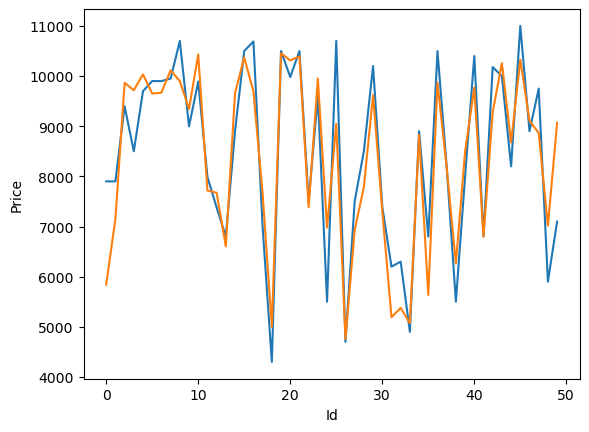

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Price',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()